In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


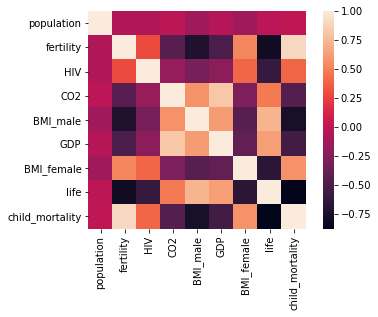

In [67]:
# if I try to plot a heatmap with the following syntax:
# ax = sns.heatmap(df)
# it will give me a TypeError:
# "ufunc 'isnan' not supported for the input types, and the inputs could not be safely 
# coerced to any supported types according to the casting rule ''safe''".

# Therefore, I tried to use the corr() function for the dataframe.
# This function computes pairwise correlation of columns, excluding NA/null values.


ax = sns.heatmap(df.corr(), square=True) #opcao azul --> cmap="YlGnBu"



In [64]:

x = df['fertility'].values # pego os valores da coluna de fertilidadeem formato de array
y = df['life'].values
print(x)

print(f"Dimensions of x before reshaping: {x.shape}")
print(f"Dimensions of y before reshaping: {y.shape}")

[2.73 6.43 2.24 1.4  1.96 1.41 1.99 1.89 2.38 1.83 1.42 1.82 2.91 5.27
 2.51 3.48 2.86 1.9  1.43 6.04 6.48 3.05 5.17 1.68 6.81 1.89 2.43 5.05
 5.1  1.91 4.91 1.43 1.5  1.89 3.76 2.73 2.95 2.32 5.31 5.16 1.62 2.74
 1.85 1.97 4.28 5.8  1.79 1.37 4.19 1.46 4.12 5.34 5.25 2.74 3.5  3.27
 1.33 2.12 2.64 2.48 1.88 2.   2.92 1.39 2.39 1.34 2.51 4.76 1.5  1.57
 3.34 5.19 1.42 1.63 4.79 5.78 2.05 2.38 6.82 1.38 4.94 1.58 2.35 1.49
 2.37 2.44 5.54 2.05 2.9  1.77 2.12 2.72 7.59 6.02 1.96 2.89 3.58 2.61
 4.07 3.06 2.58 3.26 1.33 1.36 2.2  1.34 1.49 5.06 5.11 1.41 5.13 1.28
 1.31 1.43 7.06 2.54 1.42 2.32 4.79 2.41 3.7  1.92 1.47 3.7  5.54 1.48
 4.88 1.8  2.04 2.15 6.34 1.38 1.87 2.07 2.11 2.46 1.86 5.88 3.85]
Dimensions of x before reshaping: (139,)
Dimensions of y before reshaping: (139,)


In [39]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1) # now, I transform the array into a matrix using the reshape method.
y_life = df['life'].values.reshape(-1,1)

# We need to use this line of code because it makes sure that the regression line will be drawn from the maximum value
# until the minimum value of our sample. If we do not use this, the regression line will be drawn from the maximum until
# the minimum value within the test sample, which is max = 6.82 (max(X_test)) and min = 1.31 (min(X_test)).
#prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1) # linspace function returns a number of evenly spaced points within a given range.

X_train, X_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)

The maximum value in the test sample is [6.82]
The minimum value in the test sample is [1.31]
The maximum value in the WHOLE sample is [7.59]
The minimum value in the WHOLE sample is [1.28]
0.617689151025208
The accuracy score of the model is 0.8095708266351931


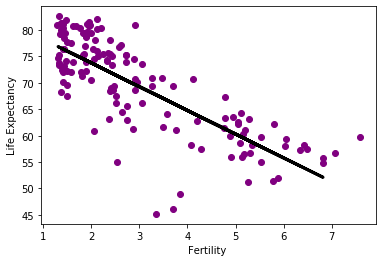

In [61]:
reg = LinearRegression()

reg.fit(X_train, y_train)

y_predict = reg.predict(X_test)
print(f"The maximum value in the test sample is {max(X_test)}")
print(f"The minimum value in the test sample is {min(X_test)}")
print(f"The maximum value in the WHOLE sample is {max(x_fertility)}")
print(f"The minimum value in the WHOLE sample is {min(x_fertility)}")

#Print accuracy --> WHY do we need to print this accuracy of the total sample instead of the model (below)
print(reg.score(x_fertility, y_life))
print(f"The accuracy score of the model is {reg.score(X_test, y_test)}") #getting the accuracy score of the model

# Plot regression line
plt.scatter(x_fertility, y_life, color='purple')
plt.plot(X_test, y_predict, color='black', linewidth=3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility ')
plt.show()

In [73]:
def life_expectancy(feature):
    x = df[feature].values
    y = df['life'].values
    x_feature = df[feature].values.reshape(-1,1) 
    y_life = df['life'].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(x_feature, y_life, test_size=0.3, random_state=42)
    reg = LinearRegression()

    reg.fit(X_train, y_train)

    y_predict = reg.predict(X_test)
#     print(f"The maximum value in the test sample is {max(X_test)}")
#     print(f"The minimum value in the test sample is {min(X_test)}")
#     print(f"The maximum value in the WHOLE sample is {max(x_fertility)}")
#     print(f"The minimum value in the WHOLE sample is {min(x_fertility)}")

    #Print accuracy --> WHY do we need to print this accuracy of the total sample instead of the model (below)
#     print(reg.score(x_fertility, y_life))
    print(f"The accuracy score of the model is {reg.score(x_feature, y_life)}") #getting the accuracy score of the model

    # Plot regression line
    plt.scatter(x_feature, y_life, color='purple')
    plt.plot(X_test, y_predict, color='black', linewidth=3)
    plt.ylabel('Life Expectancy')
    plt.xlabel(feature)
    plt.show()

The accuracy score of the model is 0.3612950796477036


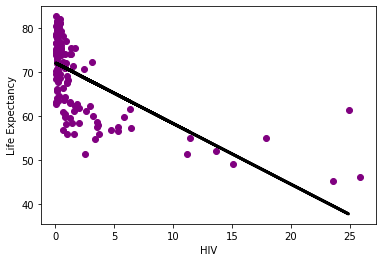

In [74]:
life_expectancy('HIV')

The accuracy score of the model is 0.20003104521547818


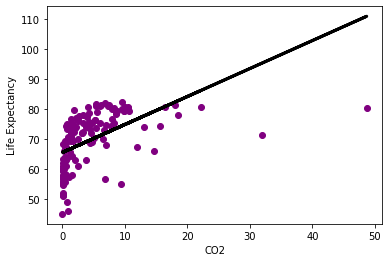

In [75]:
life_expectancy('CO2')

The accuracy score of the model is 0.3549988252244779


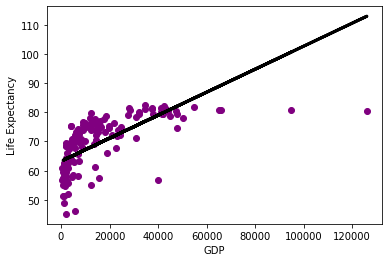

In [76]:
life_expectancy('GDP')

The accuracy score of the model is 0.7635419785551102


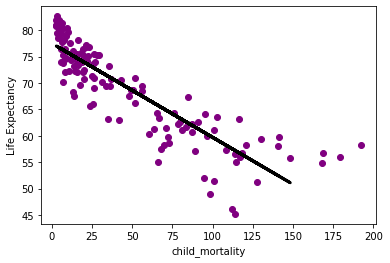

In [77]:
life_expectancy('child_mortality')